In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df = df.dropna()

In [4]:
label_encoder = LabelEncoder()

In [5]:
df['species_numeric'] = label_encoder.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [6]:
%matplotlib inline

In [7]:
df0 = df[df.species_numeric==0]
df1 = df[df.species_numeric==1]
df2 = df[df.species_numeric==2]

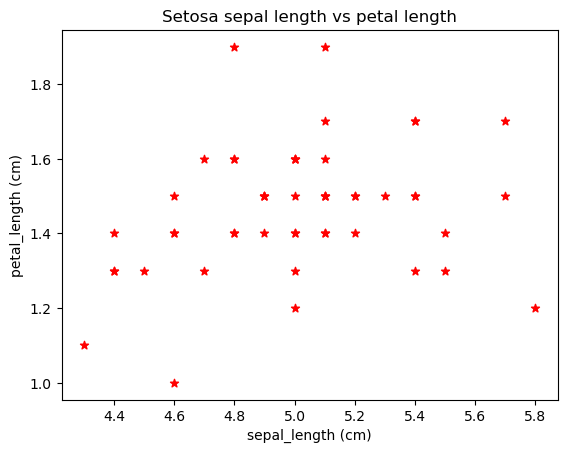

In [8]:
plt.scatter(df0['sepal_length'],df0['petal_length'] , color='red' , marker='*')

plt.title('Setosa sepal length vs petal length')
plt.xlabel('sepal_length (cm)')
plt.ylabel('petal_length (cm)')
plt.xticks(rotation=0)
plt.show()

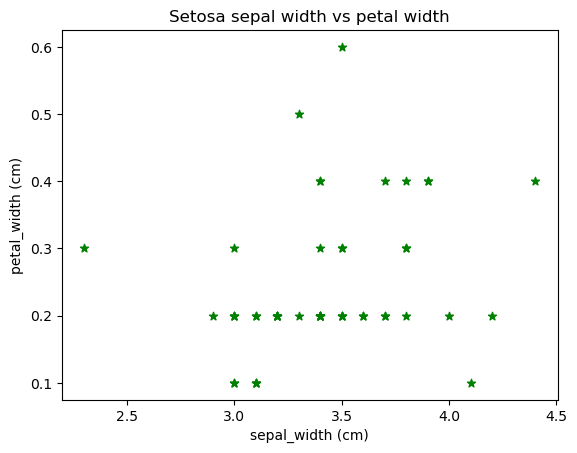

In [9]:
plt.scatter(df0['sepal_width'],df0['petal_width'] , color='green' , marker='*')

plt.title('Setosa sepal width vs petal width')
plt.xlabel('sepal_width (cm)')
plt.ylabel('petal_width (cm)')
plt.xticks(rotation=0)
plt.show()

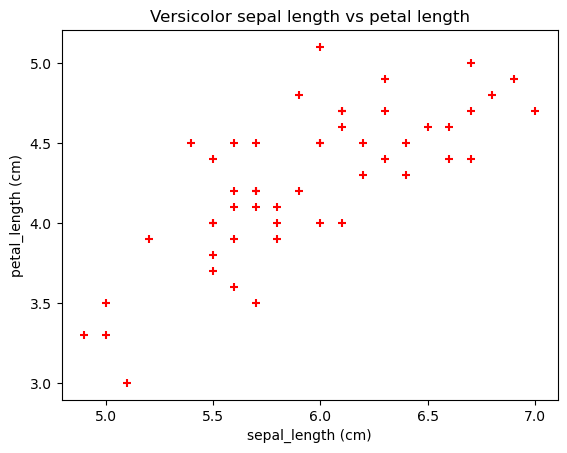

In [10]:
plt.scatter(df1['sepal_length'],df1['petal_length'] , color='red' , marker='+')

plt.title('Versicolor sepal length vs petal length')
plt.xlabel('sepal_length (cm)')
plt.ylabel('petal_length (cm)')
plt.xticks(rotation=0)
plt.show()

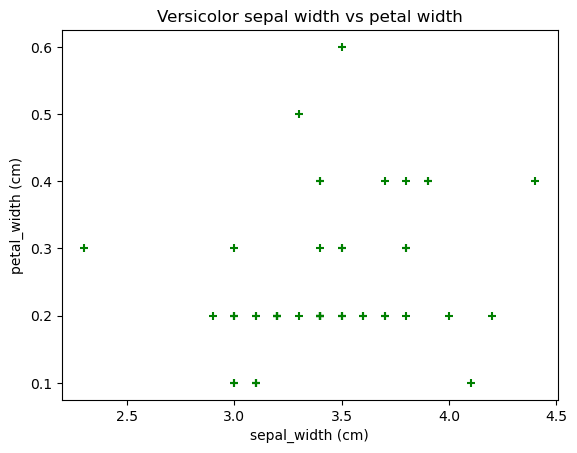

In [12]:
plt.scatter(df1['sepal_width'],df1['petal_width'] , color='green' , marker='+')

plt.title('Versicolor sepal width vs petal width')
plt.xlabel('sepal_width (cm)')
plt.ylabel('petal_width (cm)')
plt.xticks(rotation=0)
plt.show()

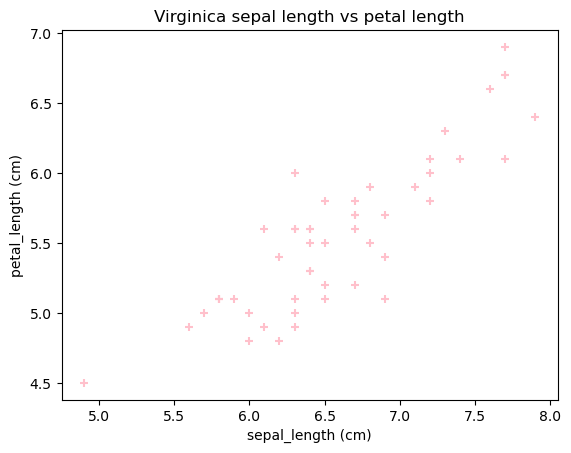

In [17]:
plt.scatter(df2['sepal_length'],df2['petal_length'] , color='pink' , marker='+')

plt.title('Virginica sepal length vs petal length')
plt.xlabel('sepal_length (cm)')
plt.ylabel('petal_length (cm)')
plt.xticks(rotation=0)
plt.show()

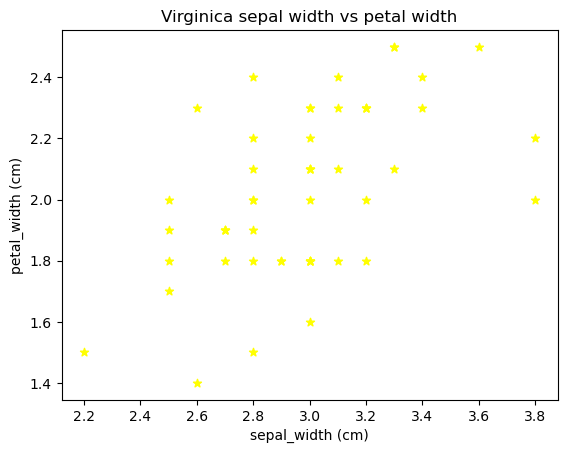

In [16]:
plt.scatter(df2['sepal_width'],df2['petal_width'] , color='yellow' , marker='*')

plt.title('Virginica sepal width vs petal width')
plt.xlabel('sepal_width (cm)')
plt.ylabel('petal_width (cm)')
plt.xticks(rotation=0)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(['species' , 'species_numeric'] , axis='columns')
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y = df.species_numeric

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.svm import SVC
model = SVC()

In [23]:
model.fit(x_train , y_train)

SVC()

In [24]:
model.score(x_test, y_test)

0.9666666666666667

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
y_pred = model.predict(x_test)

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


Text(95.72222222222221, 0.5, 'Actual')

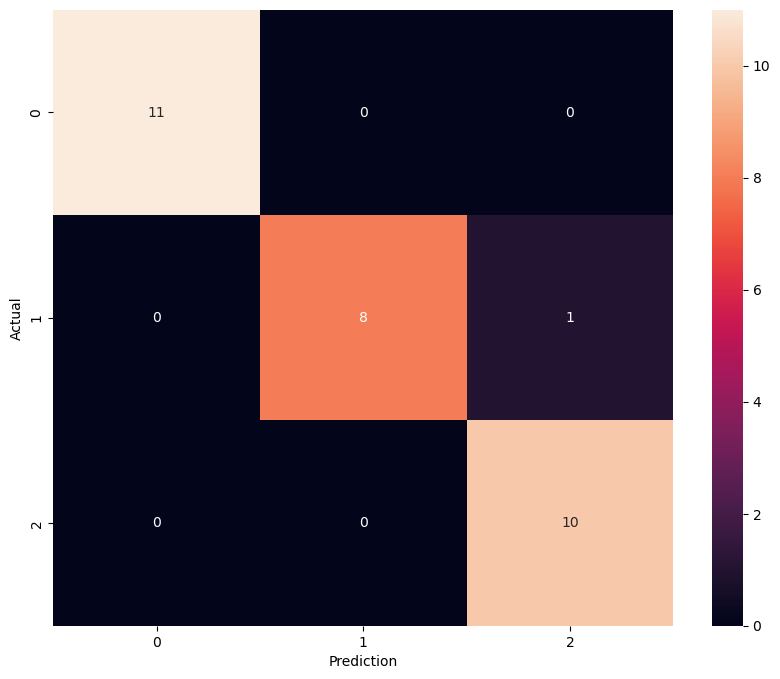

In [32]:
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(conf_mat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')